In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
train_data = pd.read_csv("/Users/garvitkhurana/Desktop/Projects/mnist_kaggle/train.csv")
test_data = pd.read_csv("/Users/garvitkhurana/Desktop/Projects/mnist_kaggle/test.csv")

In [3]:
train_data.info()
y_train=train_data["label"]
X_train=train_data.drop(["label"],axis=1,inplace=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Plotting some images

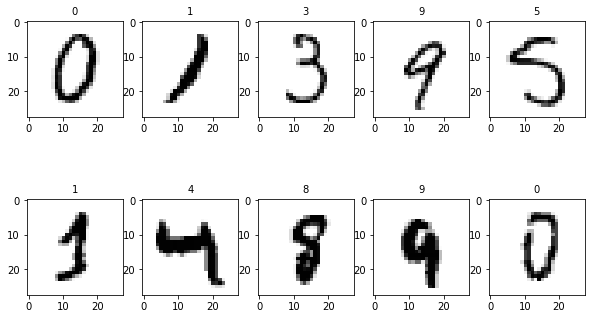

In [4]:
k=1
fig=plt.figure(figsize=(10,6))
for i in range (5,len(X_train),4224):
        t=X_train.loc[i,:].values.reshape(28,28)
        fig.add_subplot(2,5,k)
        k+=1
        plt.imshow(t,cmap="binary")
        plt.title(y_train[i],fontsize=10)

In [5]:
from sklearn.decomposition import RandomizedPCA
pca=RandomizedPCA(n_components=16).fit(X_train)
X_train_pca=pca.transform(X_train)
test_data_pca=pca.transform(test_data)


/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
from sklearn.model_selection import cross_val_score,train_test_split
X_tr,X_test,y_tr,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=54)

In [7]:
from sklearn.decomposition import RandomizedPCA
pca=RandomizedPCA(n_components=16).fit(X_tr)
X_tr_pca=pca.transform(X_tr)
X_test_pca=pca.transform(X_test)

/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_tr_pca, y_tr)
pred=knn_clf.predict(X_test_pca)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,y_test)
print('Accuracy Score: ',acc)


Accuracy Score:  0.9626190476190476


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4,)
knn_clf.fit(X_train_pca, y_train)
pred=knn_clf.predict(test_data_pca)

In [12]:
df = pd.read_csv('/Users/garvitkhurana/Desktop/Projects/mnist_kaggle/test.csv')
# ImageId,Label
df['Label'] = pd.Series(pred)
df['ImageId'] = df.index +1
sol = df[['ImageId','Label']]
sol.to_csv('knn.csv', index=False)